In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,accuracy_score,classification_report, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


In [7]:
train= pd.read_csv("/content/train.csv.zip" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])

len_train=len(train)
len_train

100000

In [16]:
test=  pd.read_csv("/content/test.csv.zip" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
test


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,NaN,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [17]:
data=pd.concat([train,test], axis=0).reset_index(drop=True)
data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [18]:

data.shape


(150000, 28)

In [19]:
data_copy=data.copy()

In [20]:
data_copy[data_copy.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [21]:
data_types=data.dtypes
data_types

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [22]:
data_copy.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [23]:
print("Descriptive statistics:")
data_copy.describe()

Descriptive statistics:


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,146850.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,10.384299,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,6.786522,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,5.330000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,9.410000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,14.840000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,36.970000,2597.000000,50.000000,82398.000000


In [24]:
data_copy.Month=pd.to_datetime(data_copy.Month,format="%B").dt.month
data_copy.Month=data_copy.Month.astype(np.int64)
data_copy.Month.head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [25]:
data_copy.describe(include='object').T

,count,unique,top,freq
ID,150000,150000,0x1602,1
Customer_ID,150000,12500,CUS_0xd40,12
Name,135000,10139,Stevex,66
Age,150000,2524,39,4198
SSN,141600,12500,078-73-5990,12
Occupation,139500,15,Lawyer,9899
Annual_Income,150000,21192,36585.12,24
Num_of_Loan,150000,623,3,21500
Type_of_Loan,132888,6260,Not Specified,2112
Num_of_Delayed_Payment,139500,1058,19,7949


In [26]:

num_features_cols=["Age","Num_of_Loan"]

for i in num_features_cols:
    data_copy[i]=data_copy[i].str.extract("(\d+)").astype(int)

data_copy.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [27]:
num_features_cols=["Outstanding_Debt","Annual_Income","Amount_invested_monthly","Monthly_Balance"]

for i in num_features_cols:
    data_copy[i]=data_copy[i].str.extract(r"(\d+\.\d+)").astype(float)

data_copy.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [28]:
data_copy['Num_of_Delayed_Payment'] = data_copy['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)


In [29]:

data_copy.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,150000.000000,1.500000e+05,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,139500.000000,146850.000000,147000.000000,150000.000000,150000.000000,150000.000000,136770.000000,146555.000000
mean,6.500000,119.337940,1.730552e+05,4190.115139,17.006940,22.623447,71.234907,10.941093,21.063400,30.934301,10.384299,28.529014,1426.220376,32.283309,1432.513579,195.305028,402.468645
std,3.452064,682.554219,1.404215e+06,3180.489657,117.069476,129.143006,461.537193,63.045460,14.860154,224.530918,6.786522,194.456058,1155.127101,5.113315,8403.759977,198.599612,213.657707
min,1.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,3.750000,25.000000,1.945549e+04,1625.265833,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.054731,30.947775,72.232194,270.150476
50%,6.500000,34.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,71.280006,128.984784,336.625664
75%,9.250000,43.000000,7.279690e+04,5948.454596,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,166.279555,236.844304,470.085170
max,12.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,1977.326102,1606.518192


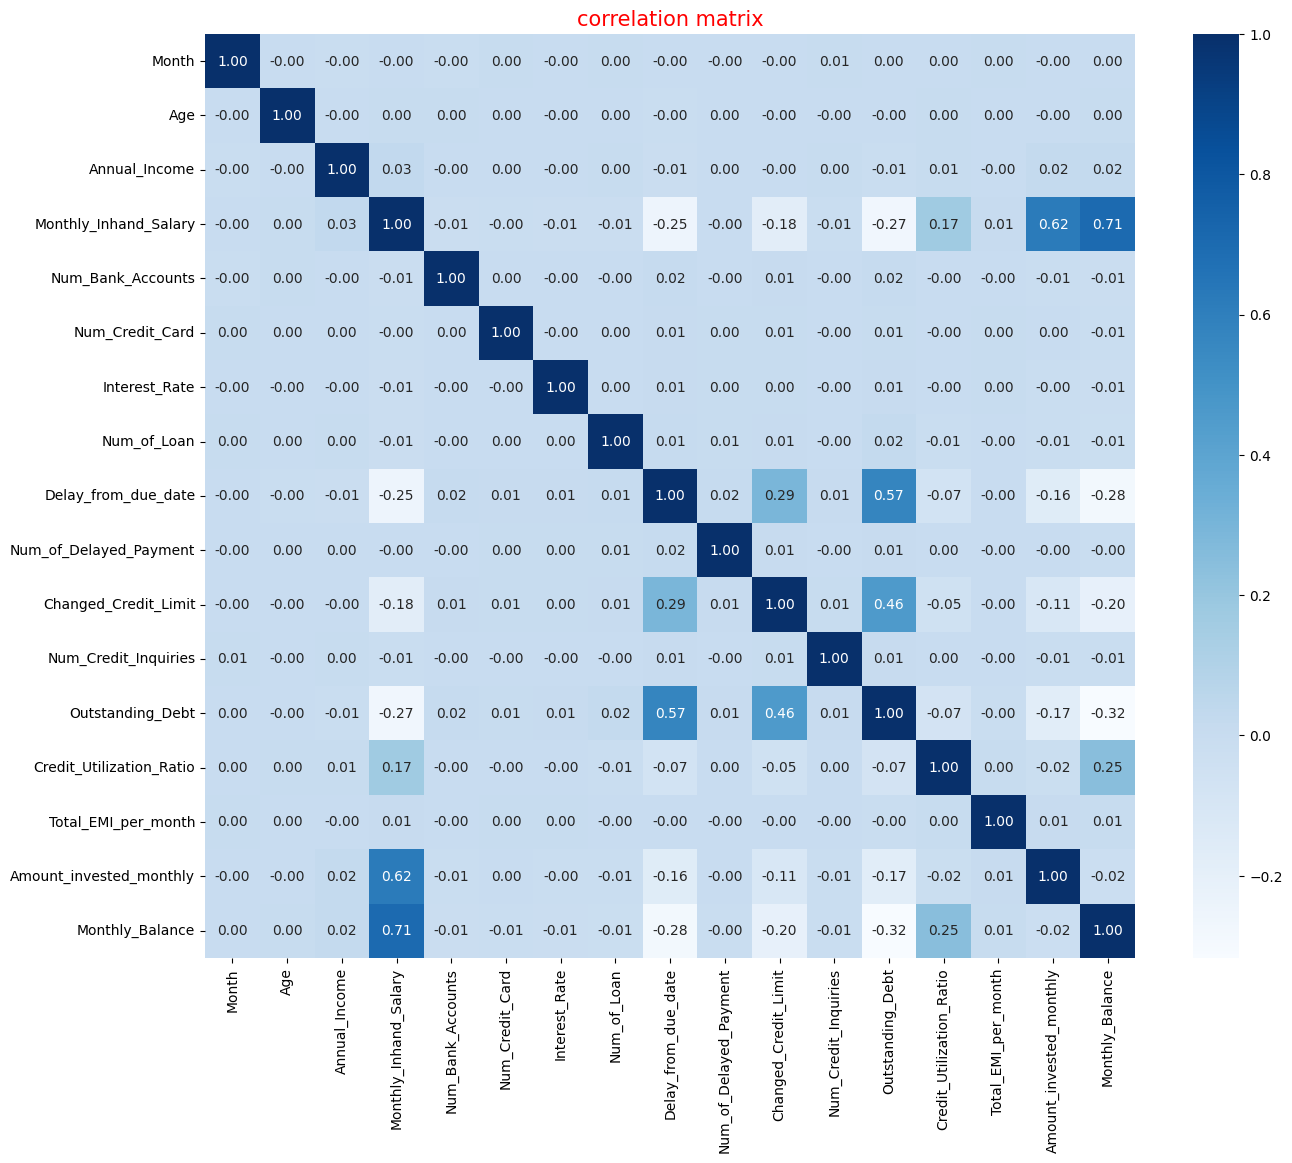

In [30]:
df_corr=data_copy.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("correlation matrix", color="red",fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

In [31]:
data_copy[data_copy['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,NaN,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN


In [32]:
data_copy["Name"].fillna(value=data_copy.groupby("Customer_ID")["Name"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN


In [33]:
data_copy["Name"].isnull().sum()


0

In [34]:
data_copy["SSN"].fillna(value=data_copy.groupby("Customer_ID")["SSN"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN


In [35]:
data_copy["SSN"].isnull().sum()

0

In [36]:
data_copy["SSN"]=data_copy["SSN"].apply(lambda x:int("".join(x.split("-"))) if pd.notna(x) else x).astype(np.int64)

In [37]:
data_copy["Occupation"].fillna(value=data_copy.groupby("Customer_ID")["Occupation"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy["Customer_ID"]=="CUS_0x21b1"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,NaN,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,5,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,6,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,0x1614,CUS_0x21b1,7,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good
15,0x1615,CUS_0x21b1,8,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
100004,0x1616,CUS_0x21b1,9,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN
100005,0x1617,CUS_0x21b1,10,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,NaN


In [38]:
data_copy["Occupation"].isnull().sum()

0

In [39]:
data_copy["Customer_ID"].unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [40]:
data_copy[data_copy["Customer_ID"]=="CUS_0xaf61"][["Month","Age","Occupation",
                                                  "Annual_Income","Num_of_Loan",
                                                  "Type_of_Loan","Credit_History_Age",
                                                  "Credit_Score"]]

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Credit_History_Age,Credit_Score
99976,1,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",29 Years and 9 Months,Good
99977,2,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",29 Years and 10 Months,Good
99978,3,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",29 Years and 11 Months,Good
99979,4,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 0 Months,Good
99980,5,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 1 Months,Standard
99981,6,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 2 Months,Good
99982,7,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 3 Months,Good
99983,8,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 4 Months,Good
149988,9,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 5 Months,NaN
149989,10,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 6 Months,NaN


In [41]:
data_copy["Num_of_Loan"].unique()


array([   4,    1,    3,  967,  100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,
        720, 1485,   49,  737, 1106,  466,  728,  313,  843,  597,  617,
        119,  663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931,
       1214,  186,  424, 1001, 1110, 1152,  457, 1433, 1187,   52, 1480,
       1047, 1035, 1347,   33,  193,  699,  329, 1451,  484,  132,  649,
        995,  545,  684, 1135, 1094, 1204,  654,   58,  348,  614, 1363,
        323, 1406, 1348,  430,  153, 1461,  905, 1312, 1424, 1154,   95,
       1353, 1228,  819, 1006,  795,  359, 1209,  590,  696, 1185, 1465,
        911, 1181,   70,  816, 1369,  143, 1416,  455,   55, 1096, 1474,
        420, 1131,  904,   89, 1259,  527, 1241,  449,  983,  418,  319,
         23,  238,  638,  138,  235,  280, 1070, 1484,  274,  494, 1459,
        404, 1354, 1495, 1391,  601, 1313, 1319,  898,  231,  752,  174,
        961, 1046,  834,  284,  438,  288, 1463, 11

In [42]:

data_copy[data_copy["Num_of_Loan"]>92][["Month","Age","Occupation",
                                                  "Annual_Income","Num_of_Loan",
                                                  "Type_of_Loan","Credit_History_Age",
                                                  "Credit_Score"]].head(10)


,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Credit_History_Age,Credit_Score
21,6,34,Engineer,143162.64,967,"Auto Loan, Auto Loan, and Not Specified",18 Years and 2 Months,Good
31,8,55,Entrepreneur,30689.89,100,Not Specified,17 Years and 10 Months,Standard
34,3,21,Developer,35547.71,100,NaN,30 Years and 10 Months,Standard
39,8,21,Developer,35547.71,100,NaN,31 Years and 3 Months,Standard
53,6,34,Lawyer,131313.40,100,"Credit-Builder Loan, and Mortgage Loan",31 Years and 0 Months,Standard
61,6,30,Media_Manager,34081.38,100,"Not Specified, Auto Loan, and Student Loan",15 Years and 0 Months,Standard
64,1,23,Doctor,114838.41,100,"Personal Loan, Debt Consolidation Loan, and Au...",21 Years and 4 Months,Good
78,7,45,Journalist,31370.80,100,"Not Specified, and Payday Loan",26 Years and 11 Months,Good
126,7,31,Scientist,31993.78,100,"Payday Loan, and Home Equity Loan",17 Years and 4 Months,Standard
180,5,20,Entrepreneur,106733.13,100,NaN,33 Years and 1 Months,Good


In [43]:
data_copy['Type_of_Loan'].fillna('NA', inplace=True)
data_copy['Type_of_Loan'].isnull().sum()


0

In [44]:
data_copy["Credit_Mix"].fillna(value=data_copy.groupby("Customer_ID")["Credit_Mix"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy["Customer_ID"]=="CUS_0x21b1"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,5,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,6,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,0x1614,CUS_0x21b1,7,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good
15,0x1615,CUS_0x21b1,8,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
100004,0x1616,CUS_0x21b1,9,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN
100005,0x1617,CUS_0x21b1,10,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,NaN


In [46]:
data_copy["Credit_Mix"].isnull().sum()

0

In [47]:
df2=data_copy.copy()

df2["Utilization_Ratio_Bin"]=["(0-10)" if i<=10 else "10-20"
                               if (i>10 and i<=20) else "20-30"
                               if (i>20 and i<=30) else "30-40"
                               if (i>30 and i<=40) else "40-50"
                               if (i>40 and i<=50) else "50-60" for i in df2["Credit_Utilization_Ratio"]]
df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Utilization_Ratio_Bin
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,20-30
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,30-40
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,20-30
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,30-40
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,20-30


In [48]:
df2["Payment_Behaviour"].unique()


array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [49]:
u_rat_list = list(df2["Utilization_Ratio_Bin"].unique())
p_beh_list = list(df2["Payment_Behaviour"].unique())
High_spent_Small = []
Low_spent_Large = []
Low_spent_Medium = []
Low_spent_Small = []
High_spent_Medium = []
High_spent_Large = []
for i in p_beh_list:
    for j in u_rat_list:
        x = df2[df2["Utilization_Ratio_Bin"] == j]
        if i == "High_spent_Small_value_payments":
            High_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Large_value_payments":
            Low_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Medium_value_payments":
            Low_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Small_value_payments":
            Low_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Medium_value_payments":
            High_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Large_value_payments":
            High_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)


In [50]:
dic={"High_spent_Small_value_payments":High_spent_Small,
    "Low_spent_Large_value_payments":Low_spent_Large,
    "Low_spent_Medium_value_payments":Low_spent_Medium,
    "Low_spent_Small_value_payments":Low_spent_Small,
    "High_spent_Medium_value_payments":High_spent_Medium,
    "High_spent_Large_value_payments":High_spent_Large}

df3=pd.DataFrame(dic)
df3["Utilization_Ratio_Bin"]=list(df2["Utilization_Ratio_Bin"].unique())
df3

,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments,Utilization_Ratio_Bin
0,11.421877,11.129009,14.535437,28.393615,16.173671,10.781227,20-30
1,11.409419,10.306436,13.719224,25.000577,17.930406,13.984586,30-40
2,9.917165,7.639208,9.963185,11.792453,23.976070,29.383341,40-50
3,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,50-60
4,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,10-20


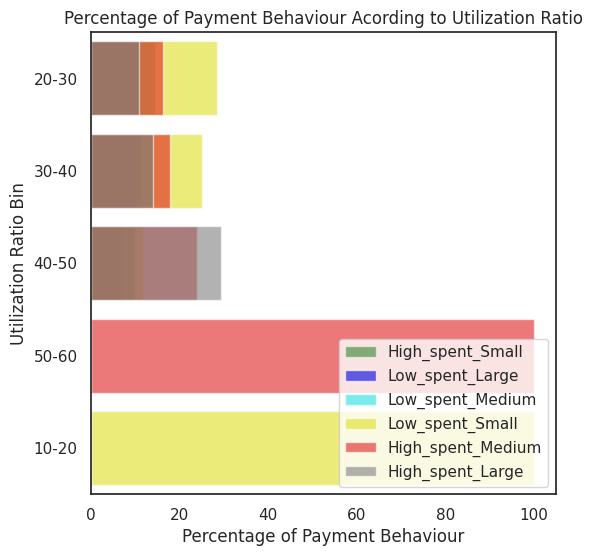

In [51]:
f,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=High_spent_Small,y=u_rat_list,color="green",alpha=0.5,label="High_spent_Small")
sns.barplot(x=Low_spent_Large,y=u_rat_list,color="blue",alpha=0.7,label="Low_spent_Large")
sns.barplot(x=Low_spent_Medium,y=u_rat_list,color="cyan",alpha=0.6,label="Low_spent_Medium")
sns.barplot(x=Low_spent_Small,y=u_rat_list,color="yellow",alpha=0.6,label="Low_spent_Small")
sns.barplot(x=High_spent_Medium,y=u_rat_list,color="red",alpha=0.6,label="High_spent_Medium")
sns.barplot(x=High_spent_Large,y=u_rat_list,color="gray",alpha=0.6,label="High_spent_Large")

ax.legend(loc="lower right",frameon=True)
ax.set(xlabel="Percentage of Payment Behaviour",ylabel="Utilization Ratio Bin",title="Percentage of Payment Behaviour Acording to Utilization Ratio")
plt.show()


In [52]:
def custom_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else pd.NA

df2["Payment_Behaviour"].fillna(value=df2.groupby(["Customer_ID", "Utilization_Ratio_Bin"])["Payment_Behaviour"].transform(custom_mode), inplace=True)
df2["Payment_Behaviour"].isnull().sum()

294

In [53]:
df2["Payment_Behaviour"].fillna(value=df2.groupby(["Utilization_Ratio_Bin"])["Payment_Behaviour"].transform(custom_mode), inplace=True)
df2["Payment_Behaviour"].isnull().sum()


0

In [54]:
data_copy["Payment_Behaviour"]=list(df2["Payment_Behaviour"])
data_copy["Payment_Behaviour"].isnull().sum()

0

In [55]:
data_copy[data_copy['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",4,13.0,9.59,74.0,Good,995.47,36.238303,29 Years and 11 Months
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",2,NaN,9.59,1.0,Good,995.47,36.065495,30 Years and 0 Months
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,NaN,Good,995.47,32.808662,NaN
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,Good,995.47,31.108037,30 Years and 2 Months
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",1,11.0,9.59,5.0,Good,995.47,42.272114,30 Years and 3 Months
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,Good,995.47,38.556181,30 Years and 4 Months
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,12.0,9.59,5.0,Good,995.47,36.246273,30 Years and 5 Months
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,39.747228,30 Years and 6 Months
149936,0x25f3a,CUS_0x3855,9,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,13.0,16.59,5.0,Good,995.47,22.070372,30 Years and 7 Months
149937,0x25f3b,CUS_0x3855,10,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,37.261217,30 Years and 8 Months


In [56]:
data_copy['Num_Credit_Inquiries'].describe()


count    147000.000000
mean         28.529014
std         194.456058
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [57]:
data_copy[data_copy['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Amount_invested_monthly']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,NaN
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,641.849589
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,NaN
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,287.234631
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,94.757926
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,231.276530
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,198.762526
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,NaN
149936,0x25f3a,CUS_0x3855,9,Xolai,28,963557106,Scientist,118677.54,9963.795,798.172006
149937,0x25f3b,CUS_0x3855,10,Xolai,28,963557106,Scientist,118677.54,9963.795,1305.107070


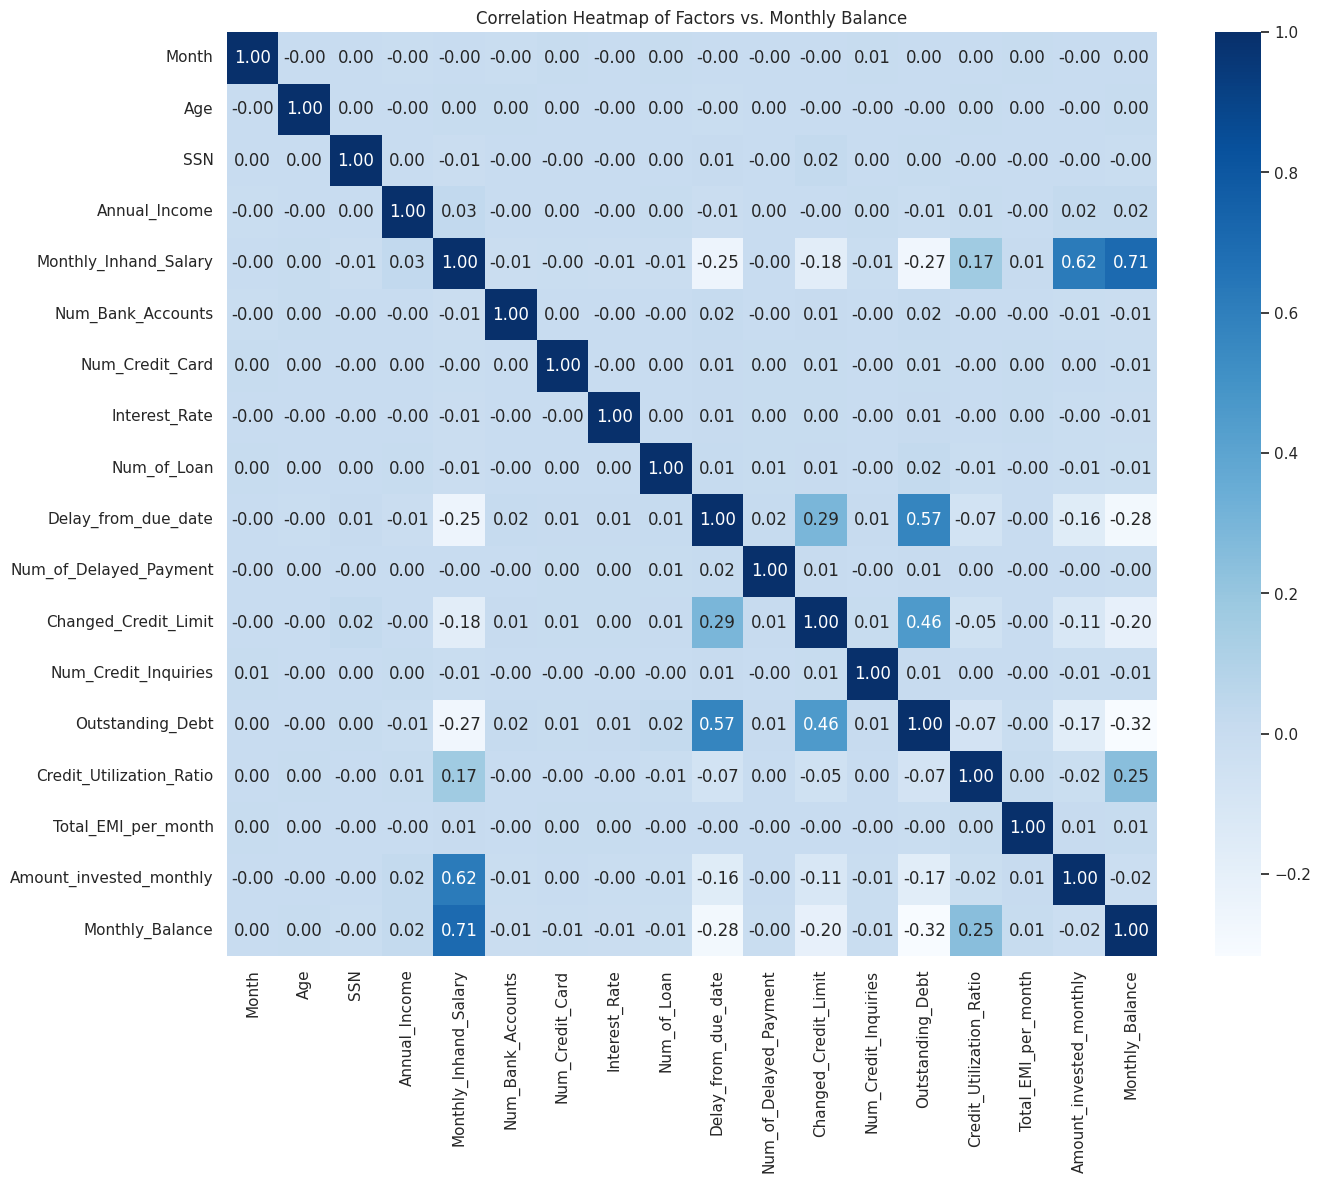

In [58]:
selected_columns=data_copy.select_dtypes(include=["number"])

correlation_matrix=selected_columns.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=True, cmap="Blues",fmt=".2f")
plt.title("Correlation Heatmap of Factors vs. Monthly Balance")
plt.show()

In [59]:
data_copy["Amount_invested_monthly"].fillna(value=data_copy.groupby(["Customer_ID", "Monthly_Inhand_Salary"])["Amount_invested_monthly"].transform(custom_mode), inplace=True)
data_copy["Amount_invested_monthly"].isnull().sum()

2096

In [60]:
data_copy[data_copy['Name']=='Greg Roumeliotisw'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Amount_invested_monthly','Monthly_Balance']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly,Monthly_Balance
37368,0xf0f6,CUS_0x670d,1,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,164.244311,301.338697
37369,0xf0f7,CUS_0x670d,2,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,98.306824,357.276184
37370,0xf0f8,CUS_0x670d,3,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,441.26877,64.314239
37371,0xf0f9,CUS_0x670d,4,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,NaN,511.113867,NaN
37372,0xf0fa,CUS_0x670d,5,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,551.585097,NaN
37373,0xf0fb,CUS_0x670d,6,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,NaN,530.58571,NaN
37374,0xf0fc,CUS_0x670d,7,Greg Roumeliotisw,15,255067657,Lawyer,17334339.00,6097.276667,43.25397,412.329038
37375,0xf0fd,CUS_0x670d,8,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,358.773664,116.809345
38440,0xf73e,CUS_0x5c07,1,Greg Roumeliotisw,31,568808390,Architect,35694.33,2990.527500,46.869072,427.472261
38441,0xf73f,CUS_0x5c07,2,Greg Roumeliotisw,31,568808390,Architect,35694.33,NaN,NaN,389.344759


In [61]:
data_copy.isnull().sum()


ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      2096
Payment_Behaviour               0
Monthly_Balance              3445
Credit_Score                50000
dtype: int64

In [63]:
df_train=data_copy[:len_train]
df_test=data_copy[len_train:]

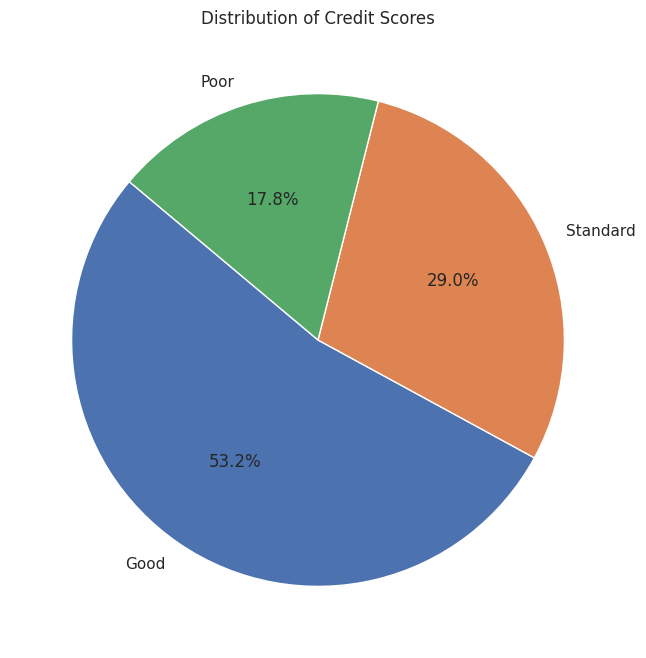

In [64]:
plt.figure(figsize=(8, 8))
plt.pie(df_train['Credit_Score'].value_counts(), labels=df_train['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()